# The Titanic Kaggle Challenge

## 1. Problem definition 
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



## 2. Data
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.


## 3. Features 
|Variable|Definition|Key|
|---|---|---|
|survival	|Survival	|0 = No, 1 = Yes|
|pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|	Sex	|Male or Female|
|Age|	Age in years ||	
|sibsp	|# of siblings / spouses aboard the Titanic| |	
|parch	|# of parents / children aboard the Titanic||	
|ticket	|Ticket number| |	
|fare	|Passenger fare| |	
|cabin	|Cabin number| |	
|embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

Further notes:
* pclass: A proxy for socio-economic status (SES)
     1st = Upper
     2nd = Middle
     3rd = Lower

* age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.
    

## 4. Evaluation metrics.
<b> Your score is the percentage of passengers you correctly predict. This is known as accuracy.</b>
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)

|PassengerId|Survived|
|---|---|
|892|0|
|893|1|
|894|0|


## 5. Modelling 
Use different ML models

## 6. Experiments...

## Importing the libraries

In [1]:
# Linear Algebra
import numpy as np
import pandas as pd
import math

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

# Data Preparation
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_val_score, cross_validate, train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_auc_score, roc_curve, classification_report, f1_score, precision_score, recall_score

In [2]:
# Importing the 2 datasets from kaggle
df = pd.read_csv("Data/Titanic_train.csv")
dft = pd.read_csv("Data/Titanic_test.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA (Exploratory Data Analysis)

In [3]:
# Shape and General info about the training dataset
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None, (891, 12))

In [4]:
# Statistical parameters for numerical & categorical features
# For numerical
df.describe(include = ['float64', "int64"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Statistical Description of numerical features:
* `Age` has mean = 29.7, std = 14.5, range(min = 0.4, max = 80)
    1. 25%qunatile = 20.1 (25% of all the population is below age 20.1), 
    2. 50%qunatile = 28 = median(50% of the population is below that age)
    3. 75%qunatile = 38 (75% of all the population is below age 38)

### 25% of population is older than 38 years. range = (38, 80) => possible outliers.

* `Fare` has mean = 32.2, std = 49.7, range(min = 0, max = 512)
    1. 25%qunatile = 7.9 (25% of all the population is below Fare 7.9), 
    2. 50%qunatile = 14.4 = median(50% of the population is below Fare 14.4)
    3. 75%qunatile = 31 (75% of all the population is below Fare 31)
    
### 25% of population has Fare > 31. range = (31, 500) => possible outliers.

## All numeric features have count = 891, but `Age` has 714, => `Age` has missing values.

In [5]:
# For categorical features
df.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Youseff, Mr. Gerious",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### Statistical Description for Categorical features.
* `Name` has uniqueness = 891, freq = 1. Name is not repeating.
* `Sex` has uniqueness = 2(male, female), freq = 577(male) instances.
* `Ticket` has uniqueness = 681, freq = 7(CA. 2343) most frequent ticket. Very high uniqueness and low frequency.
* `Cabin` has uniqueness = 147, freq = 4(G6) most frequent cabin. High uniqueness and low frequency.
* `Embarked` has uniqueness = 3(S,Q,C), freq = 644(port S).

## The count of all categorical features is 891, except for `Cabin`= 204, `Embarked`= 889. 
* `Cabin` has a lot of missing values (more than 75%), `Embarked` has only 2 missing values.
* 65% of the population were men, and 35% women.
* 72% of the population embarked form port **S**.

In [6]:
# Check the features of the dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Visualization of the Target Variable distribution

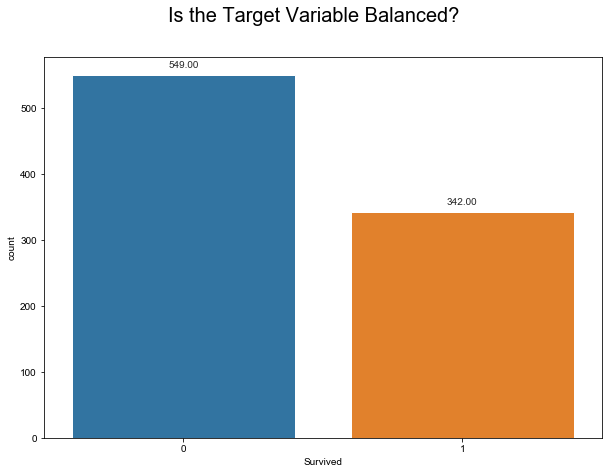

In [7]:
fig, ax = plt.subplots(figsize = (10,7))
fig.suptitle("Is the Target Variable Balanced?", fontsize = 20)
sns.set_style("darkgrid")
ax = sns.countplot(df["Survived"], data = df)
# Visualizing the values on the graph 
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')  

### As seen above the target variable is slightly unbalanced. There are more people which died (549) that survived (342).

### Split the features into numeric and categorical features.

In [8]:
# numeric = numeric feature;
# categorical = categorical features
numeric, categorical = [], []
for features in df.columns:
    if df[features].dtype == "O":
        categorical.append(features)
    else:
        numeric.append(features)
print(f"Numeric features: {numeric}, length:  {len(numeric)}")
print(f"Categorical features: {categorical}, length: {len(categorical)}")

Numeric features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], length:  7
Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], length: 5


### Plot the number of numeric vs categorical features

,Type
PassengerId,Numeric
Survived,Numeric
Pclass,Numeric
Name,Categorical
Sex,Categorical
Age,Numeric
SibSp,Numeric
Parch,Numeric
Ticket,Categorical
Fare,Numeric


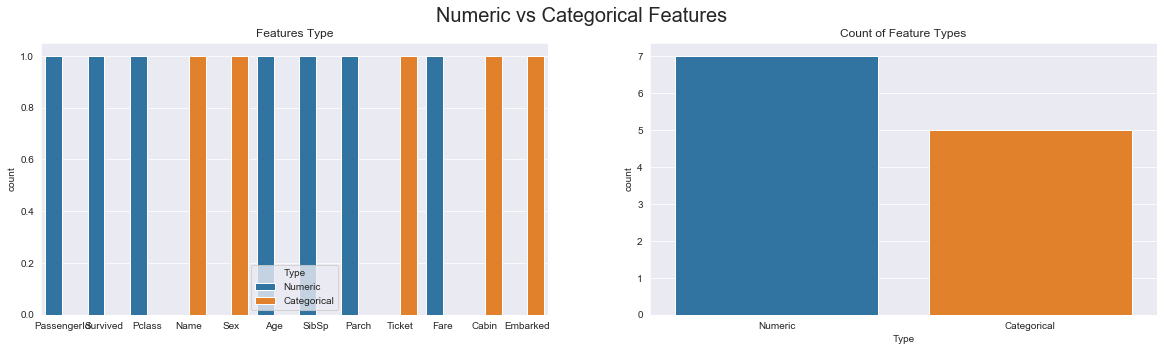

In [9]:
# features is a df containing as index the labels, and as Type the type of the feature
features = pd.DataFrame(index = df.columns, columns = ["Type"])
features.loc[numeric, ["Type"]] = "Numeric"
features.loc[categorical, ["Type"]] = "Categorical"
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
fig.suptitle("Numeric vs Categorical Features", fontsize = 20)
ax[0].set_title("Features Type")
ax[0] = sns.countplot(x = features.index, hue = features["Type"], ax = ax[0])
ax[1].set_title("Count of Feature Types")
ax[1] = sns.countplot(x = features["Type"])
features

### There are 7 Numeric and 5 Categorical features.
## Visualizing the uniqueness of each feature

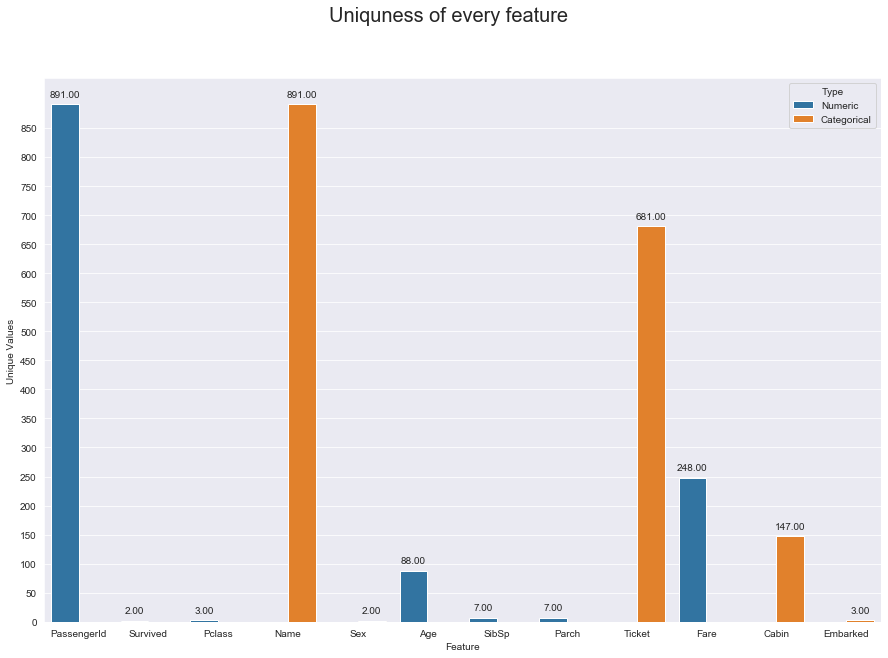

In [10]:
# uniqueness is a df which holds as index the features and Unique Values label which hold count of unique values/ each feature
uniqueness = pd.DataFrame(index = df.columns, columns = ["Unique Values"])
for feature in uniqueness.index:
    uniqueness.loc[feature, "Unique Values"] = df[feature].nunique()
uniqueness["Feature"] = uniqueness.index
fig, ax = plt.subplots(figsize = (15,10))
fig.suptitle("Uniquness of every feature", fontsize = 20)
ax.set_yticks(np.arange(0, len(df), 50))
ax = sns.barplot(x = uniqueness["Feature"], y = uniqueness["Unique Values"], hue = features["Type"], data = uniqueness);

# Visualizing the values on the graph 
total = len(uniqueness['Unique Values'])

for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        

### As seen above, the Numeric `PassengerId` and Categorical `Name` have uniqueness 100% 
* Categorical `Ticket` and `Cabin` have great percentages of uniqueness. 
* Numeric `Fare` and `Age` have also great percentages of uniqueness.


In [11]:
# high_uniqueness is a list which holds the Categorical features with high uniqueness(>10 unique values) 
high_uniqueness = []
for feature in uniqueness["Feature"]:
    if(feature in categorical and uniqueness.loc[feature, "Unique Values"] > 10):
        high_uniqueness.append(feature)
print(f"Categorical Features with high uniqueness = {high_uniqueness}")

Categorical Features with high uniqueness = ['Name', 'Ticket', 'Cabin']


## Plot the count for categorical features and distribution of numeric features
## Univariate Distribution

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


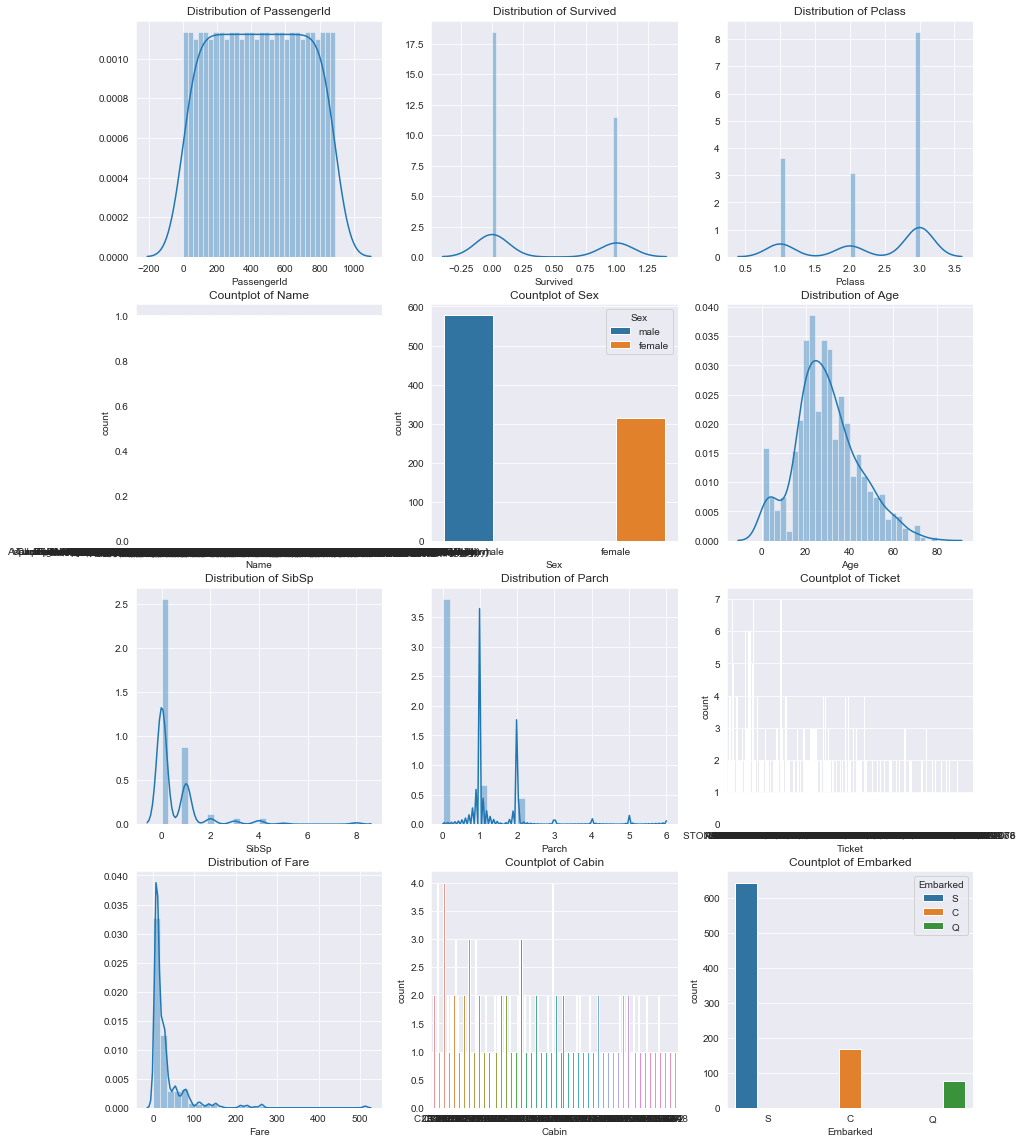

In [12]:
def plot_distribution(data = df, height = 25, width = 15, features = len(df.columns)):
    """
    This function plots the histogram distribution for numeric features and plots the count for categorical features
    """
    fig, ax = plt.subplots(nrows = math.ceil(features/3), ncols = 3, figsize = (width, height))
    j = 0
    for i in range(0, features):
        if data.columns[i] in numeric:
            ax[math.floor(i/3), j].set_title("Distribution of "+ data.columns[i])
            sns.distplot(data[data.columns[i]], bins = 30, ax=ax[math.floor(i/3), j])
            j = j + 1
            if(j == 3):
                j = 0
                continue
            continue
        if data.columns[i] in categorical:
            ax[math.floor(i/3), j].set_title("Countplot of "+ data.columns[i])
            if(data.columns[i] in high_uniqueness):
                plt.xticks([])
                sns.countplot(data[data.columns[i]], ax = ax[math.floor(i/3), j])
            
            if(data.columns[i] not in high_uniqueness):
                sns.countplot(data[data.columns[i]], hue = data[data.columns[i]], ax = ax[math.floor(i/3), j]) 
            j = j + 1
            if(j == 3):
                j = 0
                continue
            continue
plot_distribution(data = df, height = 20, width = 15, features = len(df.columns))

### As seen above, the count plots of `Name, Ticket and Cabin` are not very clear because there are a lot of unique features.

## Missing values visualizations:

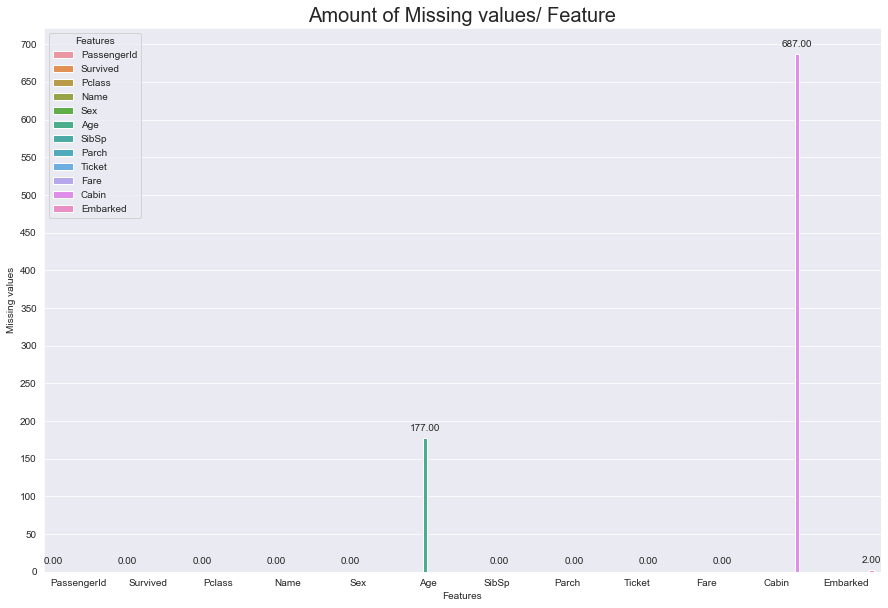

In [13]:
# missing is a df which holds the features and Missing values feature with missing values/feature
missing = pd.DataFrame(data = {"Features": df.columns, "Missing values": df.isna().sum()})
fig, ax = plt.subplots(figsize = (15,10))
plt.title("Amount of Missing values/ Feature", fontsize = 20)
ax.set_yticks(np.arange(0, len(df), 50))
ax = sns.barplot(x = missing["Features"], y = missing["Missing values"], hue = missing["Features"], data = missing)

#splot = sns.barplot(data=df, x = 'sex', y = 'total_bill', ci = None)
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### There are 177 missing values for `Age`, 687 for `Cabin` and 2 for `Embarked` from a total of 891 samples of data.

### Another way to visualize the missing values is with the `missingno` library.

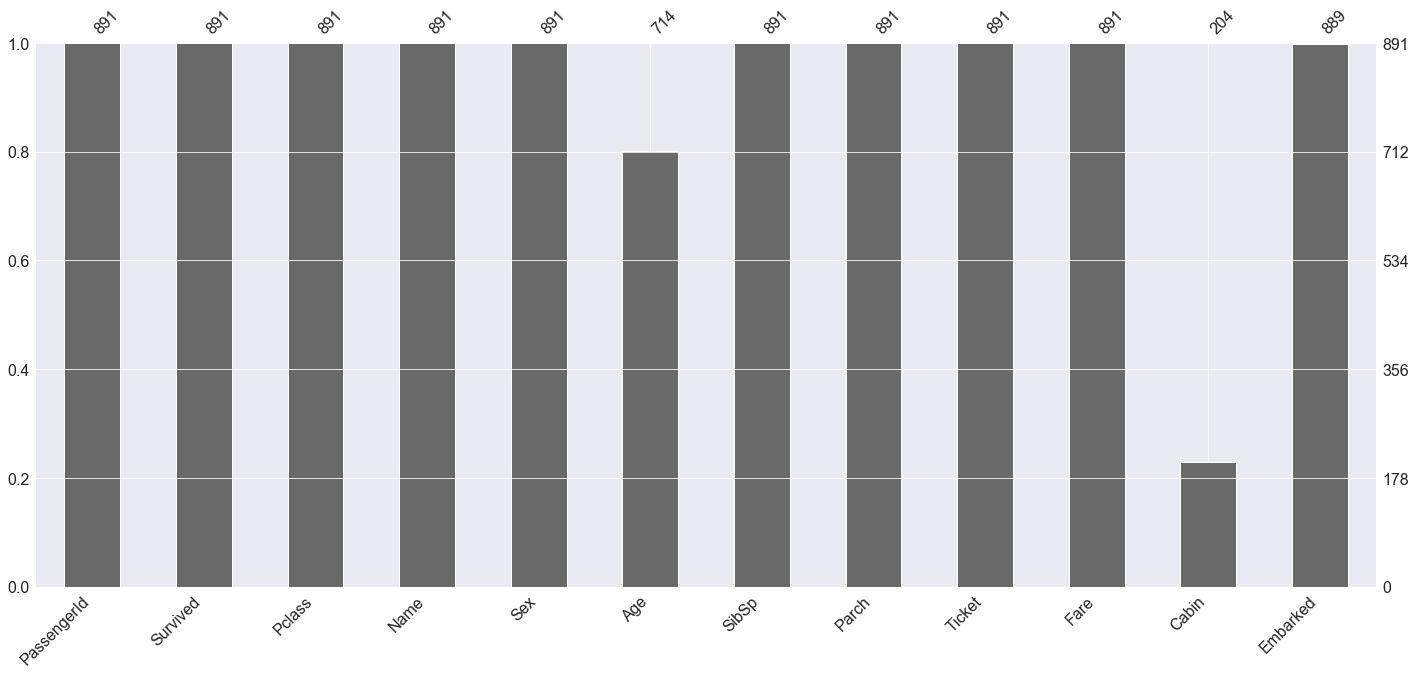

In [14]:
missingno.bar(df, sort = "ascending");

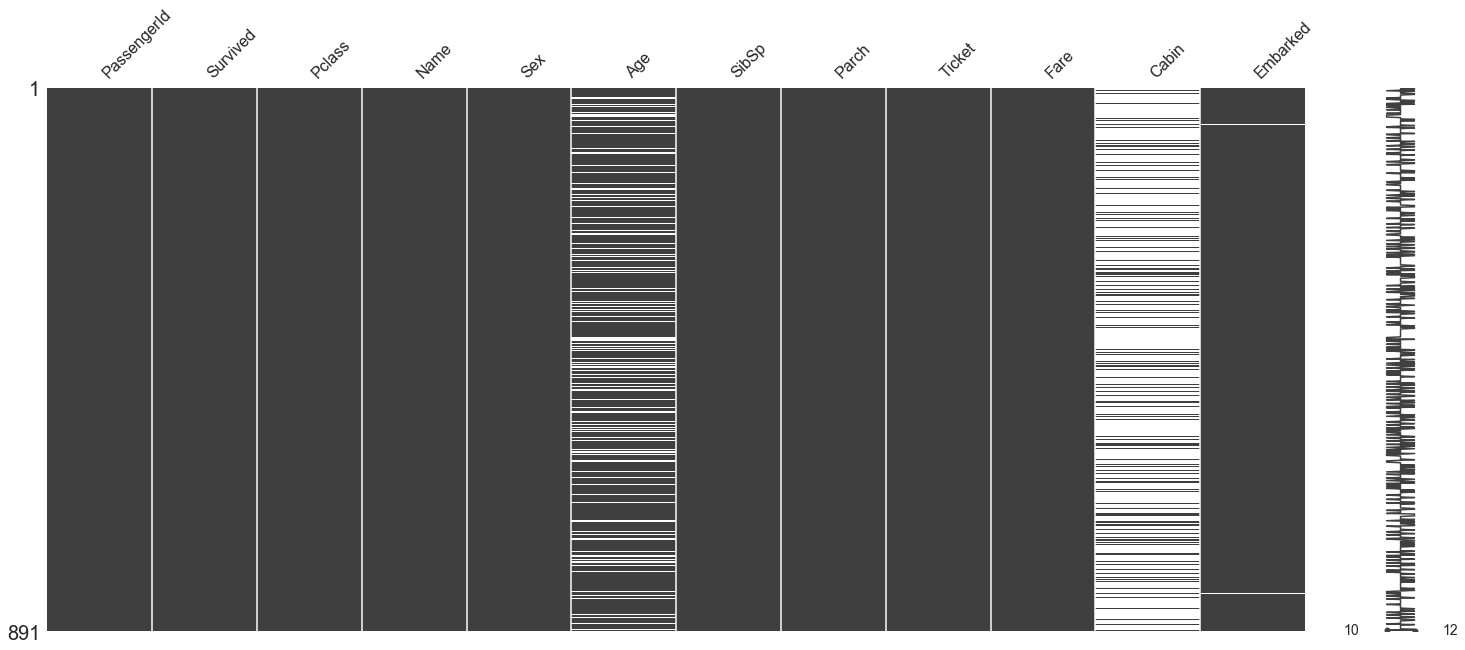

In [15]:
missingno.matrix(df);

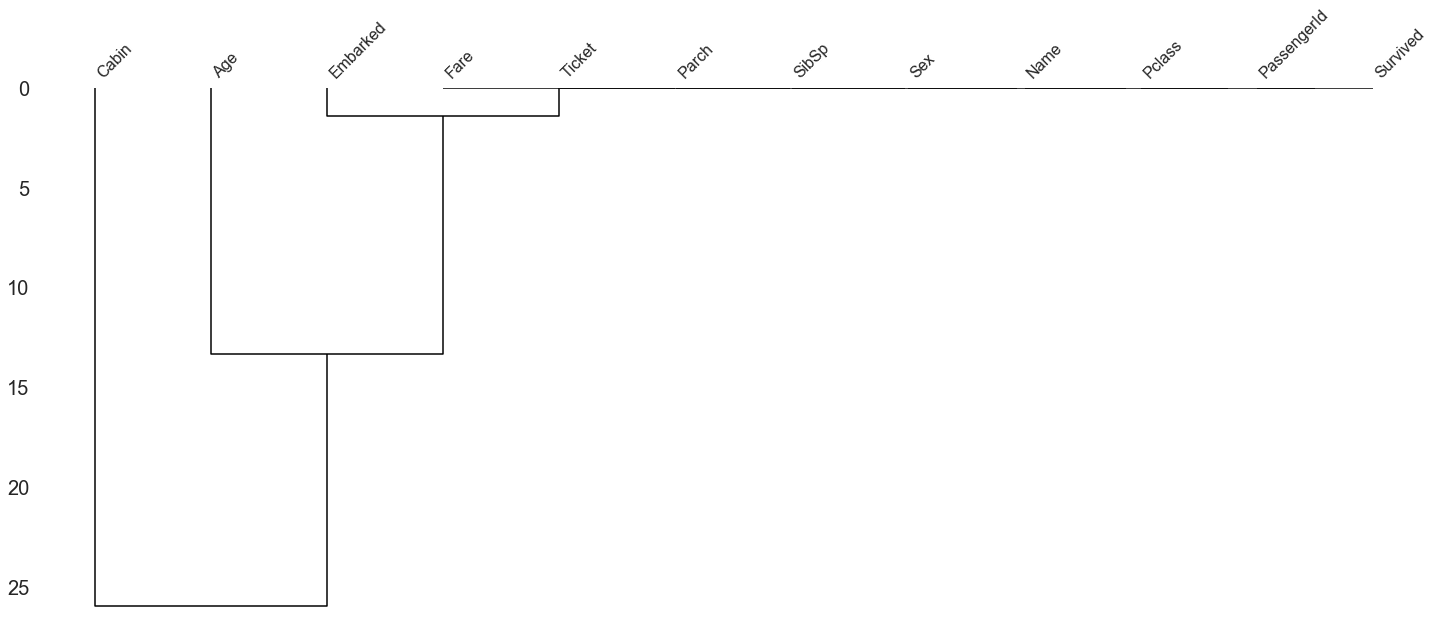

In [16]:
missingno.dendrogram(df);

# Bivariate Distribution of every feature with respect to Target Variable

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


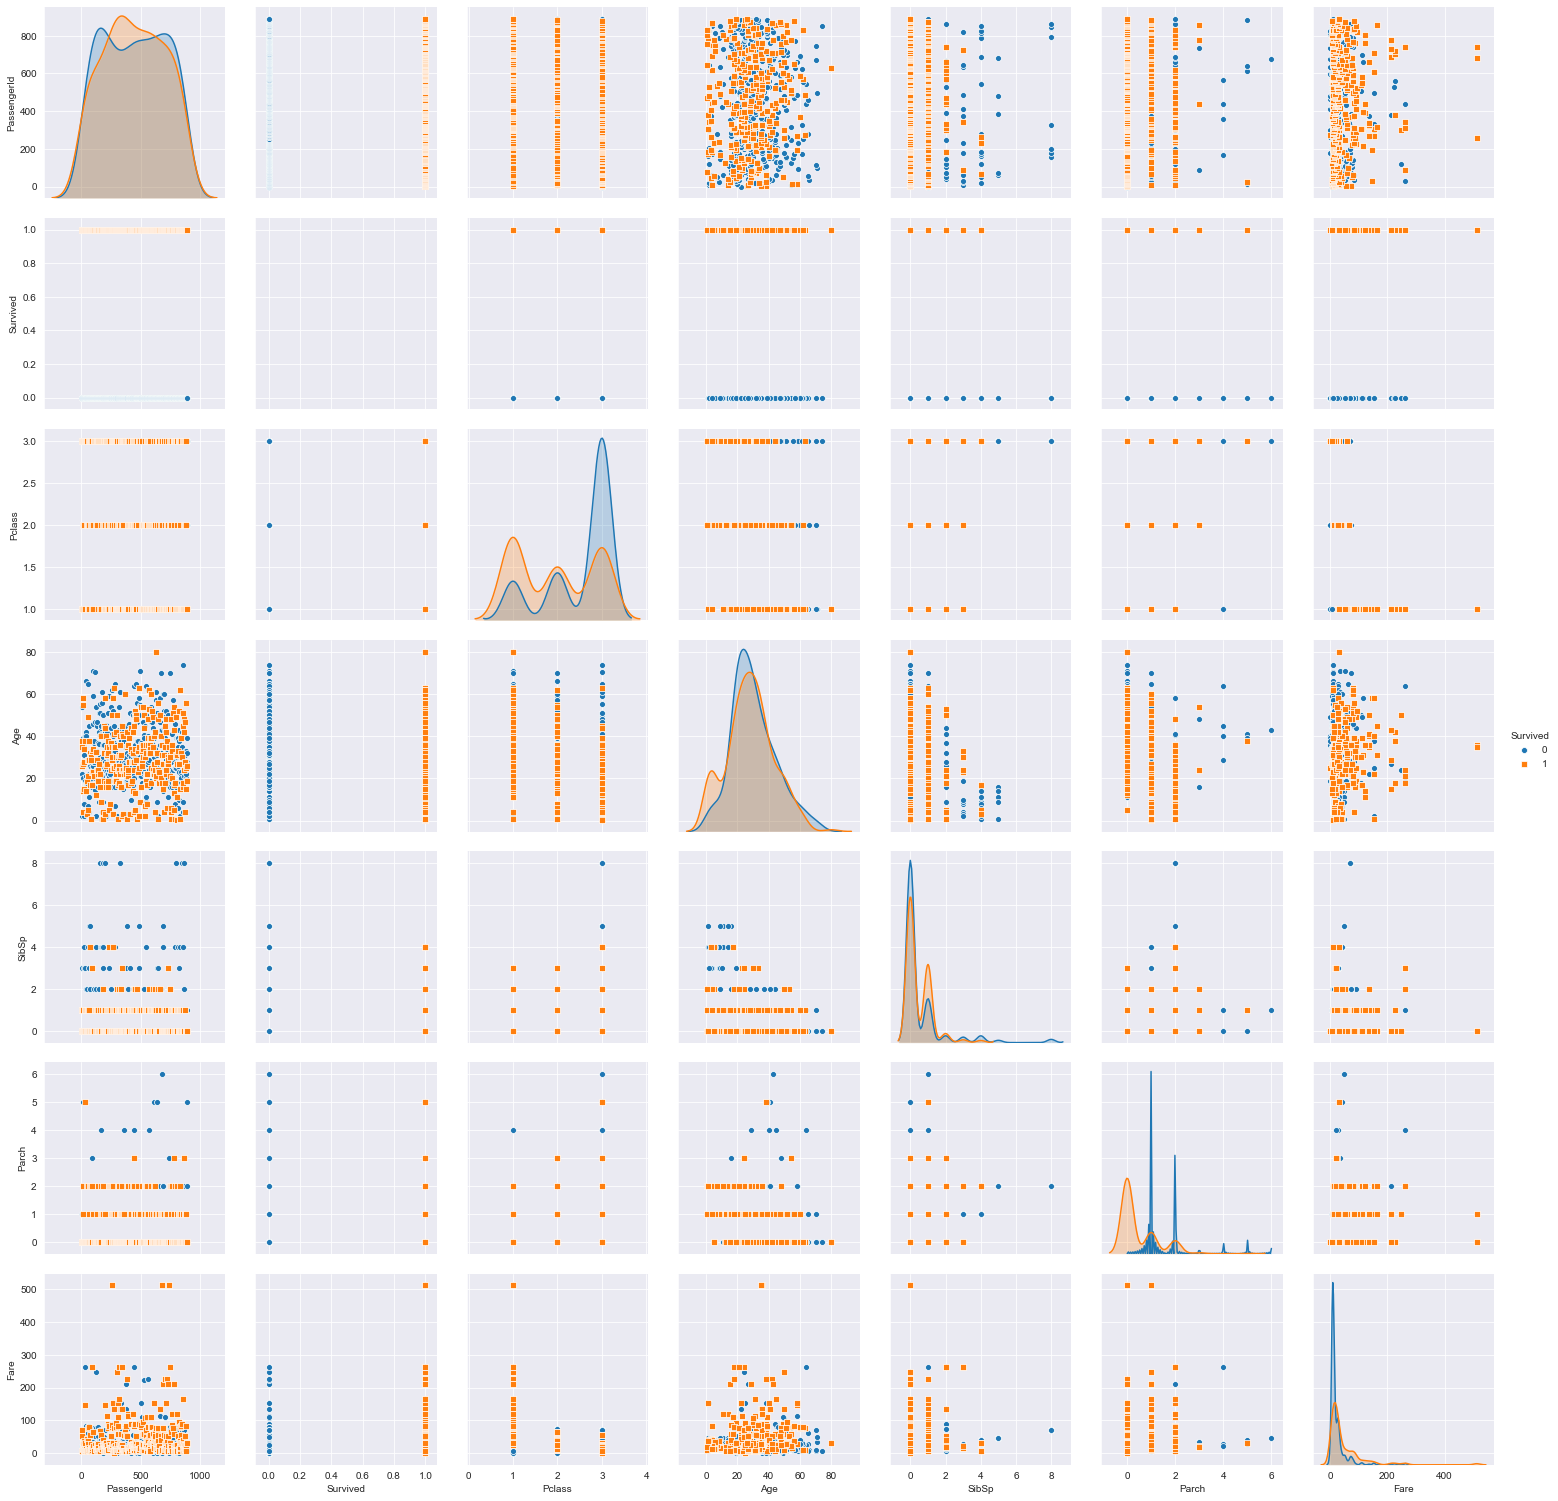

In [17]:
# Distribution of numerical features vs target variable 
sns.pairplot(data = df, hue = "Survived", markers = ["o", "s"], height = 3);

## Categorical Plots.

In [18]:
    annot = {}
    annot["Male Survived"] = len(df[(df["Sex"]=="male") &(df["Survived"]== 1)])
    annot["Male Died"] = len(df[(df["Sex"]=="male") &(df["Survived"]== 0)]) 
    annot["Female Survived"] = len(df[(df["Sex"]=="female") &(df["Survived"]== 1)]) 
    annot["Female Died"] = len(df[(df["Sex"]=="female") &(df["Survived"]== 0)])
    annot = str(annot)

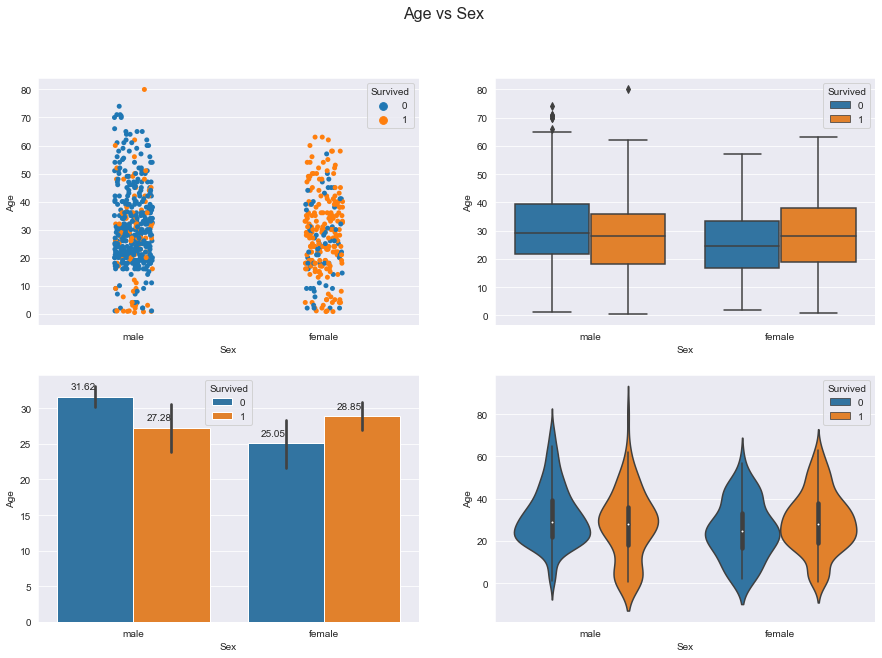

In [19]:
def catplot(title, param1, param2, param3):
    """
    This function plots 4 catplots for categorical features: 1) scatter, 2) Box, 3) bar, 4) violin
    """ 
    fig, ax = plt.subplots(nrows = 2, ncols = 2 ,figsize = (15, 10))
    fig.suptitle(title, fontsize = 16)
    sns.set_style("darkgrid")
    sns.catplot(x = param1, y = param2, data = df, hue = param3, kind = 'strip', ax = ax[0, 0]);
    sns.catplot(x = param1, y = param2, data = df, hue = param3, kind = 'box', ax = ax[0, 1]);
    sns.catplot(x = param1, y = param2, data = df, hue = param3, kind = 'bar', ax = ax[1, 0]);
    sns.catplot(x = param1, y = param2, data = df, hue = param3, kind = 'violin', ax = ax[1, 1]);
    # plt.close() closes the additional figures created by catplot
    plt.close(2)
    plt.close(3)
    plt.close(4)
    plt.close(5)

    for a in ax[1,0].patches:
         ax[1,0].annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'right', va = 'center', xytext = (0, 10), textcoords = 'offset points')
        
    
catplot(title = "Age vs Sex", param1 = "Sex", param2 = "Age", param3 = "Survived")

### As seen above the majority of the females managed to survive, but the majority of the males didn't make it.
Also the majority of the youngsters made it (between 0-10 years).

`Scatter plot`: Between age (15-60) the majority of men died, while the majority of the woman survived.

`The box plot`: shows that half of the man that did not survived are at the interquartile range (22,40), a quarter is below 22 and a quarter is above 40. There seem to be some outliers above age 65. Half of the man that did survive are in the range (18, 37), a quarter below 18 and a quarter above 37.

**Note** more men between 30-40 died than those between 22 and 30. less between 28 and 35 survived than between 18, 28.
All men between 18-22 survived and all between 37-40 died.

For the women, from those whose died half are between 17-34 , and quarters between 0-17 and 34-58.
From those whose survived half are between 20-39 and quarters between 0-20 and 39-63.

**Note** the population of women is quite distributed the median of the interquartile range is in the middle. 
All women between 17-20 died and all women between 34-39 survived.

`Bar plot`: show the middle of the interqurtile range, the median quartile.

`Violin plot`: From age 15-22 there is an ambrupt increase in the number of dead men. The maximum deaths occur at age 22, then the number of dead people then to decrease nearly linearly. From age 0-10 and 18-25 there is a linear increase of men which survived. Between 10-18 there were not so many survived. After age 25 the number of survived men decrease linearly.

From age 0 to 22 there is a linear increase of women which were dead, after the 22 age, the number of dead women tend to decrease linearly with increase in age. Between 15 and 22 there is an abrut increase in survivability, then it decreases linearly.
                                                                                                                    	



# A recognizeable pattern is FIRST WOMAN AND CHILDREN, then MEN.

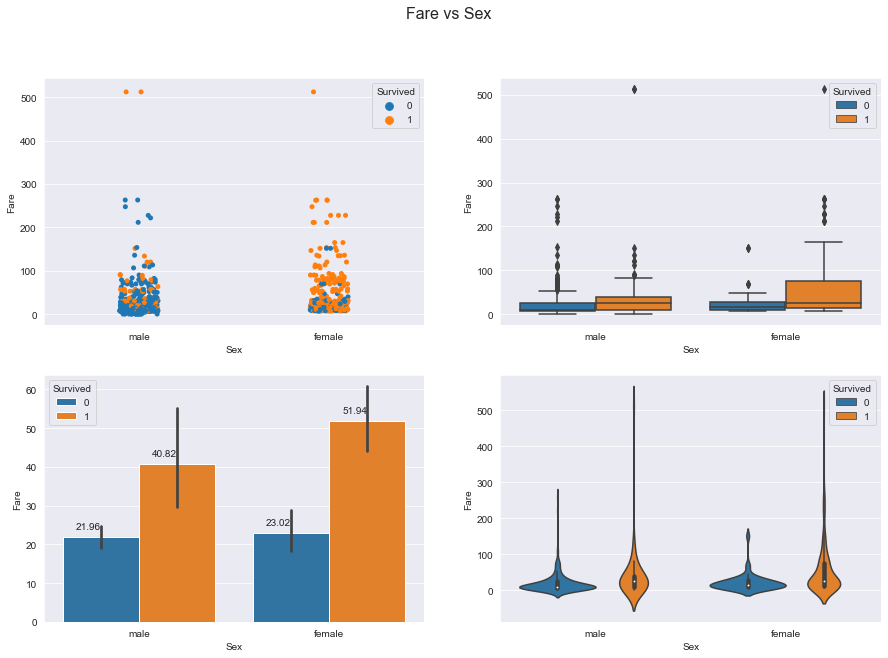

In [20]:
catplot(title = "Fare vs Sex", param1 = "Sex", param2 = "Fare", param3 = "Survived")

### As seen above the majority of the females managed to survive, but the majority of the males didn't make it.


`Scatter plot`: Between fare (0-50) the majority of men died, while the majority of the woman survived.
Again, women seem to have a greater survivability which increase with the fare, but for the man, there is a little increase in the survivability associated with the increase in fare.

`The box plot`: shows that half of the man that did not survived are at the interquartile range (5,20), a quarter is below 5 and a quarter is between 20-50. There seem to be some outliers above fare 50. Half of the man that did survive are in the range (5, 40), a quarter below 5 and a quarter between (40, 80).

**Note** All men between 50-80 survived.

For the women, from those whose died half are between 5-20 , and quarters between 20-50 
From those whose survived half are between 5-70 and quarters between 0-5 and 70-160.

**Note** the population of women who survived is much greater as the fare increase.
The majority of women between 50-160 survived.

`Bar plot`: show the middle of the interqurtile range, the median quartile.

`Violin plot`: Abrupt increase in death for men from 0-22 fare an then an aburpt decrease in death from 22 to 50.
Nearly linear increase from 0-22 then decrease of survivability for men.

For women an abrut increase in deaths from 0-23 and then an abrut decrease from 23-160.
Nearly linear increase in save from 0-23 and linear decrease from 23-500


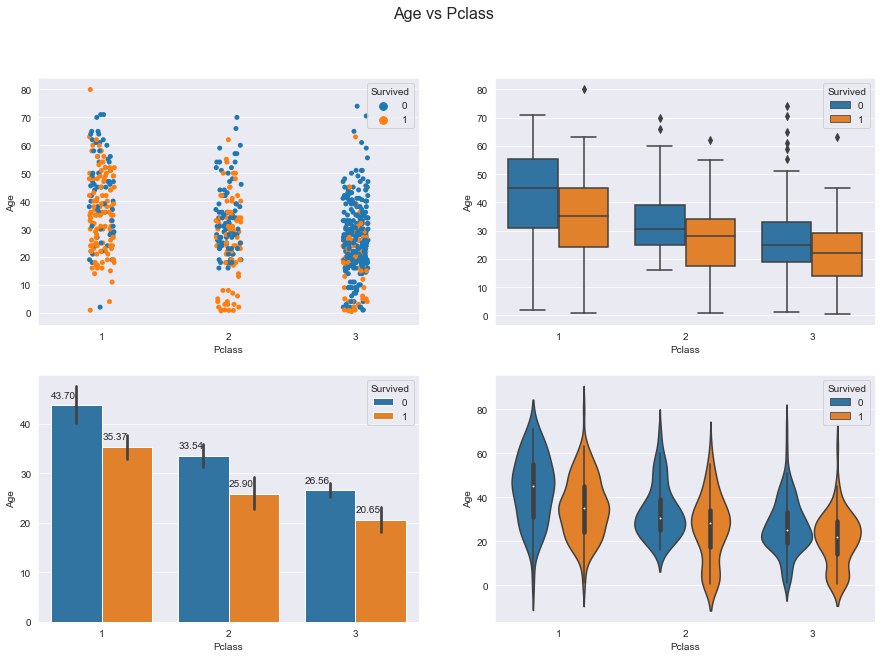

In [21]:
catplot(title = "Age vs Pclass", param1 = "Pclass", param2 = "Age", param3 = "Survived")

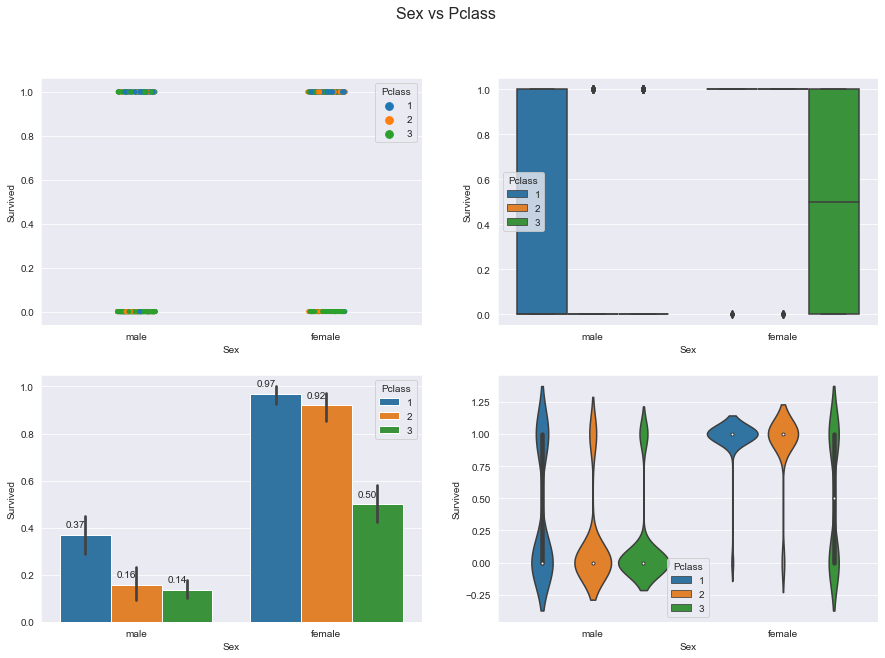

In [22]:
catplot(title = "Sex vs Pclass", param1 = "Sex", param2 = "Survived", param3 = "Pclass")

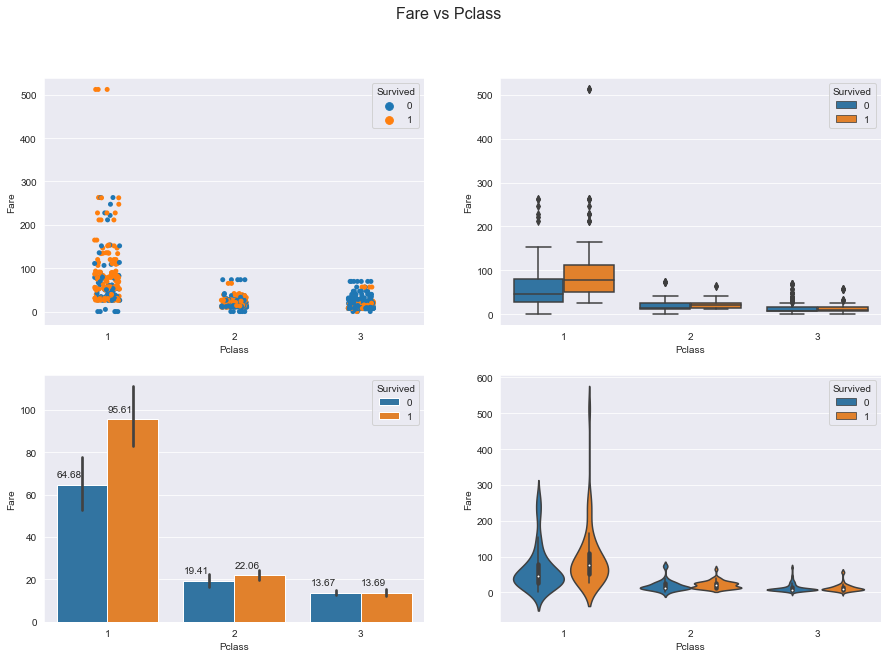

In [23]:
catplot(title = "Fare vs Pclass", param1 = "Pclass", param2 = "Fare", param3 = "Survived")

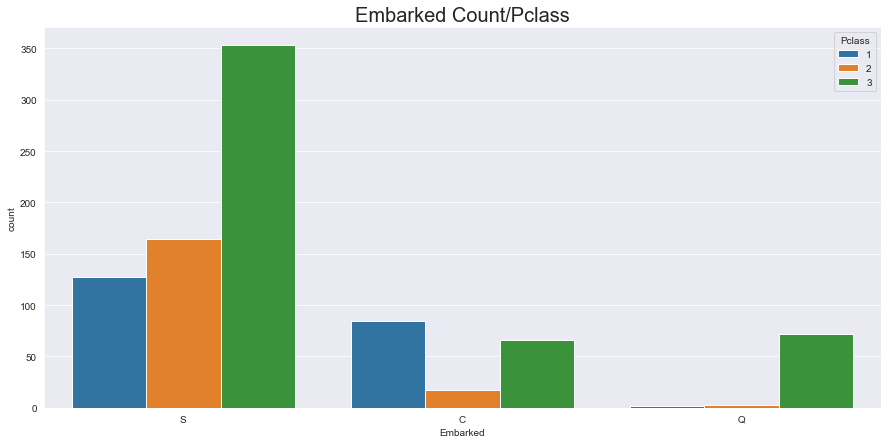

In [24]:
fig, ax = plt.subplots(figsize = (15,7))
plt.title("Embarked Count/Pclass", fontsize = 20)
sns.countplot(x = df["Embarked"], data = df, hue = "Pclass");

### Count of Sex for every Pclass

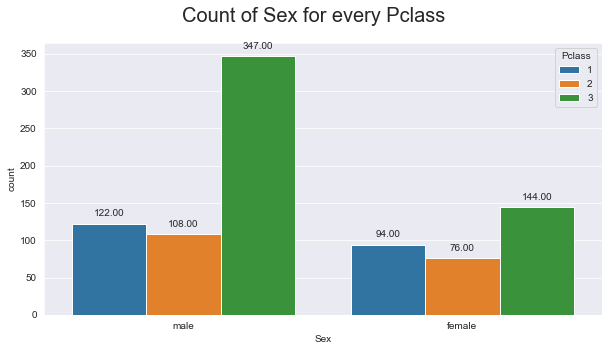

In [25]:
def countplot(text, x, hue, data):
    fig, ax = plt.subplots(figsize = (10,5))
    fig.suptitle(text, fontsize = 20)
    sns.set_style("darkgrid")
    ax = sns.countplot(x = x, hue = hue, data = data)
   
    for a in ax.patches:
        ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
countplot(text = "Count of Sex for every Pclass", x = "Sex", hue = "Pclass", data = df)

### A lot of men 60%  were on class 3, 19% on class 2 and 21% on class 1.
### Women were > 40% on class 3, the rest distributed on class 1 and 2. 

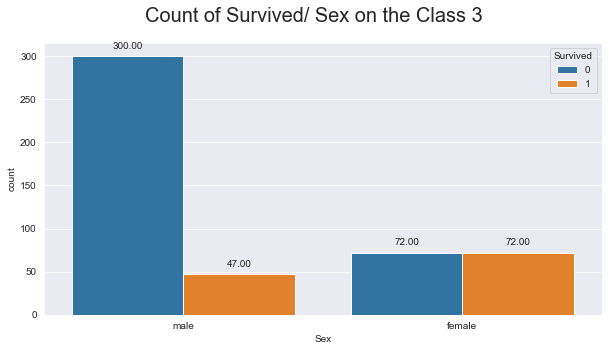

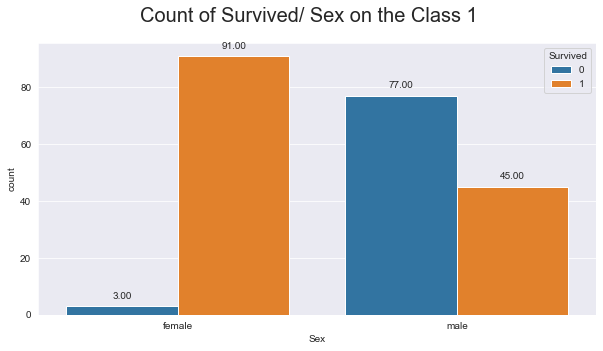

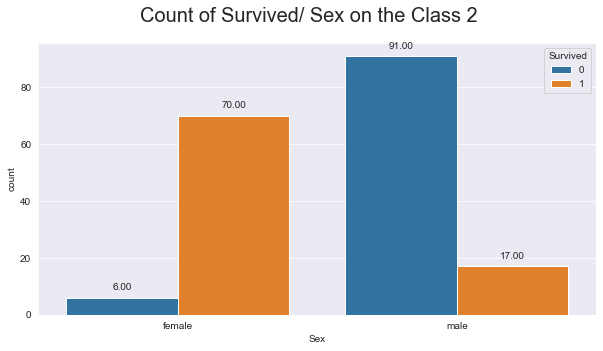

In [26]:
for i in df["Pclass"].unique():
    countplot(text = "Count of Survived/ Sex on the Class "+ str(i), x = "Sex", hue = "Survived", data = df[df["Pclass"]==i])

### From class 3: 86% males did not survive and 50% of the females did not make it.
### From class 2: 84% males did not survive and 92% women survived.
### From class 1: 63% males did not survive and 97% women survived.

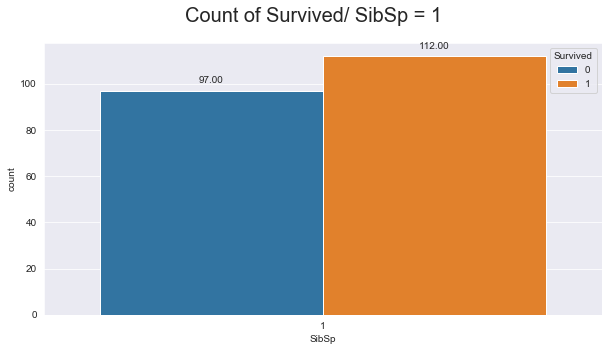

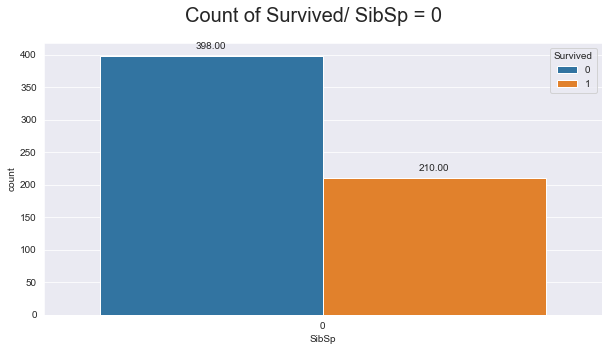

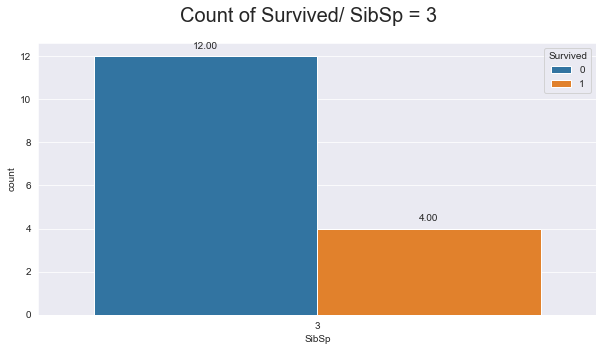

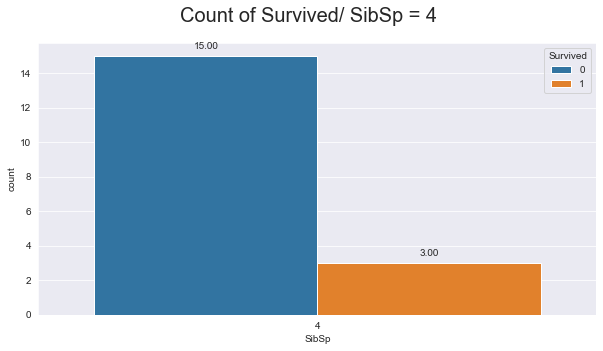

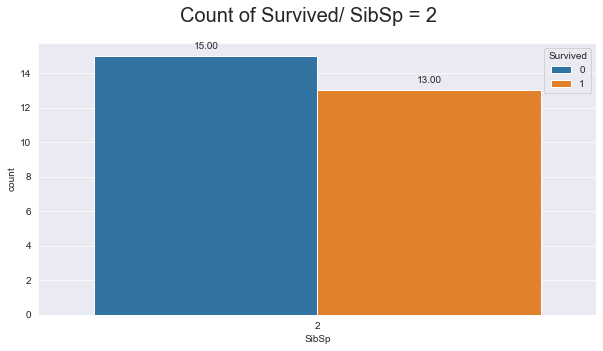

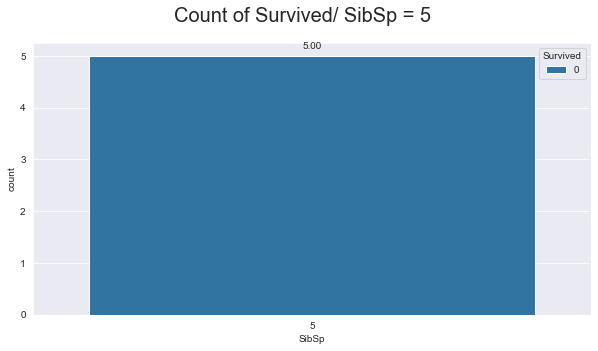

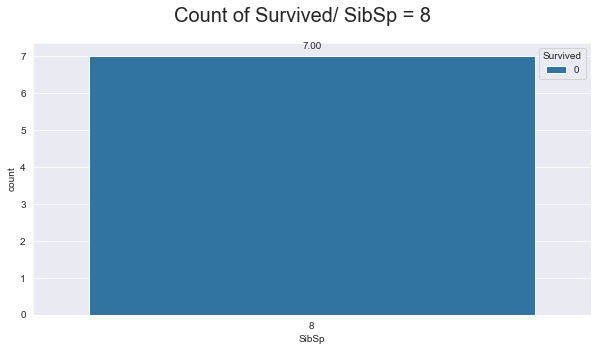

In [27]:
for i in df["SibSp"].unique():
    countplot(text = "Count of Survived/ SibSp = "+str(i), x = "SibSp", hue = "Survived", data = df[df["SibSp"]==i])

### SibSp = nr of siblings/spouses. As seen above number of individuals decreases with the increase in number of children.
### for 0 children  35% of individuals survived
### for 1 child. 56% of the individuals survived
### for 2 children 46% of the individuals survived
### for 3 children 25% of the individuals survived
### for 4 children 16% of the individuals survived
### for 5 and 8 none survived.

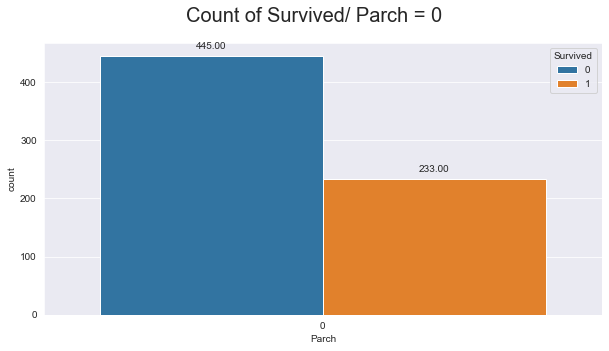

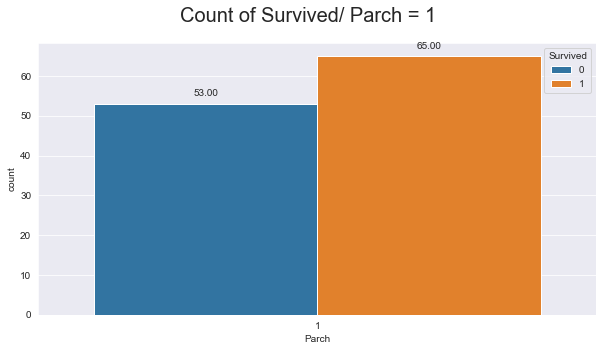

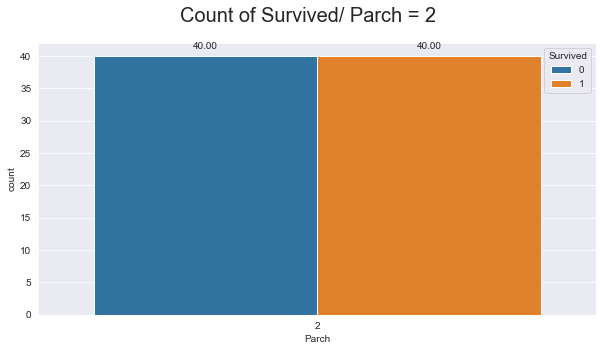

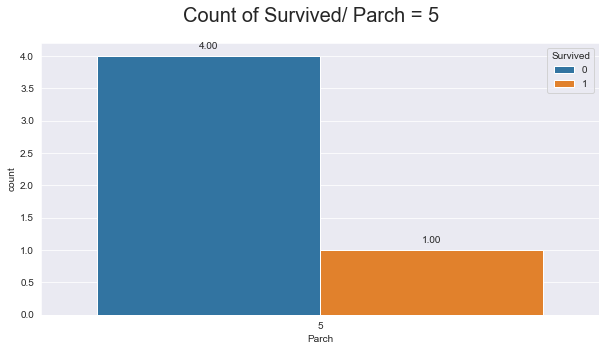

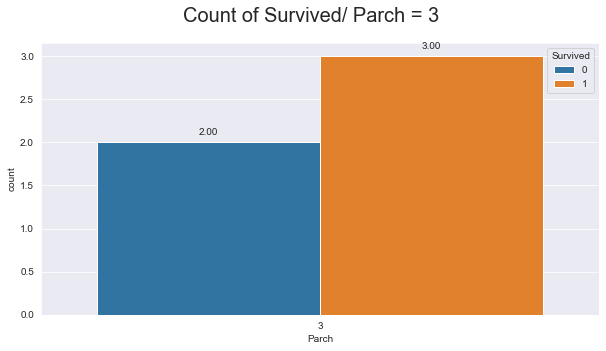

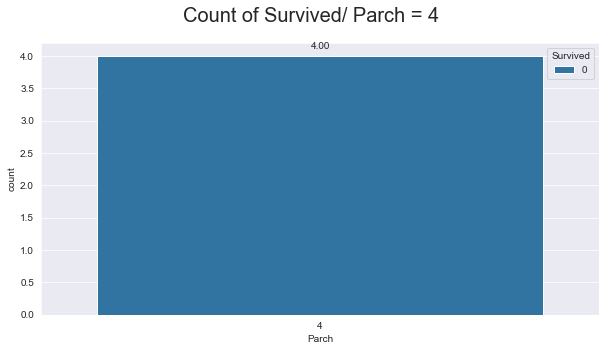

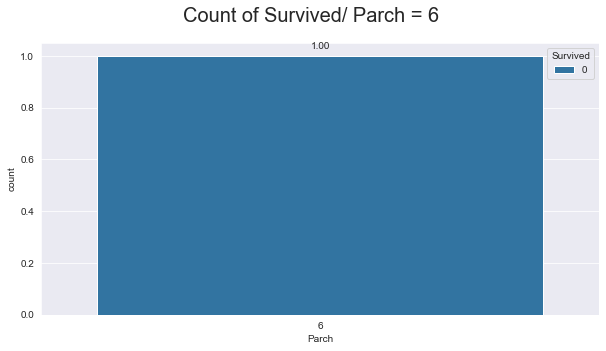

In [28]:
for i in df["Parch"].unique():
    countplot(text = "Count of Survived/ Parch = "+str(i), x = "Parch", hue = "Survived", data = df[df["Parch"]==i])

### Parch = number of parents/children. 
### 33% of all the individuals which either had no children or no parents died
 

## Survivability rates / bins of age

In [29]:
# data_cut is a df containing the age as categories 
data, data_cut = df.copy(), df.copy()
data_cut = pd.cut(data_cut["Age"], bins = 10)
data_cut = pd.get_dummies(data = data_cut)
data = pd.concat([data, data_cut], axis=1, sort=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]","(40.21, 48.168]","(48.168, 56.126]","(56.126, 64.084]","(64.084, 72.042]","(72.042, 80.0]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,1,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0


In [30]:
data_cut.head()

Age,"(0.34, 8.378]","(8.378, 16.336]","(16.336, 24.294]","(24.294, 32.252]","(32.252, 40.21]","(40.21, 48.168]","(48.168, 56.126]","(56.126, 64.084]","(64.084, 72.042]","(72.042, 80.0]"
0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [31]:
# age =  dictionary with keys the age bins and values the counts/ age bins
age = {}
for key, value in data_cut.items():
    age[key] = data_cut[key].sum()
age

{Interval(0.34, 8.378, closed='right'): 54,
 Interval(8.378, 16.336, closed='right'): 46,
 Interval(16.336, 24.294, closed='right'): 177,
 Interval(24.294, 32.252, closed='right'): 169,
 Interval(32.252, 40.21, closed='right'): 118,
 Interval(40.21, 48.168, closed='right'): 70,
 Interval(48.168, 56.126, closed='right'): 45,
 Interval(56.126, 64.084, closed='right'): 24,
 Interval(64.084, 72.042, closed='right'): 9,
 Interval(72.042, 80.0, closed='right'): 2}

In [32]:
age_df = pd.DataFrame(columns = ["Age bins", "Counts", "Survived"])
age_df["Age bins"], age_df["Counts"] = age.keys(), age.values()

age_bins = data.iloc[:, 12:] 
age_bins["Survived"] = data["Survived"]
survived = {}
for key, values in age_bins.items():
        if key != "Survived":
            survived[key] = len(age_bins[(age_bins.loc[:, key] == 1) & (age_bins["Survived"] == 1)])
                
        if key == "Survived":
            break
survived

{Interval(0.34, 8.378, closed='right'): 36,
 Interval(8.378, 16.336, closed='right'): 19,
 Interval(16.336, 24.294, closed='right'): 63,
 Interval(24.294, 32.252, closed='right'): 65,
 Interval(32.252, 40.21, closed='right'): 52,
 Interval(40.21, 48.168, closed='right'): 24,
 Interval(48.168, 56.126, closed='right'): 21,
 Interval(56.126, 64.084, closed='right'): 9,
 Interval(64.084, 72.042, closed='right'): 0,
 Interval(72.042, 80.0, closed='right'): 1}

In [33]:
age_df["Survived"] = survived.values()
age_df["Survived %"] = 100*age_df["Survived"]/age_df["Counts"]
age_df

,Age bins,Counts,Survived,Survived %
0,"(0.34, 8.378]",54,36,66.666667
1,"(8.378, 16.336]",46,19,41.304348
2,"(16.336, 24.294]",177,63,35.593220
3,"(24.294, 32.252]",169,65,38.461538
4,"(32.252, 40.21]",118,52,44.067797
5,"(40.21, 48.168]",70,24,34.285714
6,"(48.168, 56.126]",45,21,46.666667
7,"(56.126, 64.084]",24,9,37.500000
8,"(64.084, 72.042]",9,0,0.000000
9,"(72.042, 80.0]",2,1,50.000000


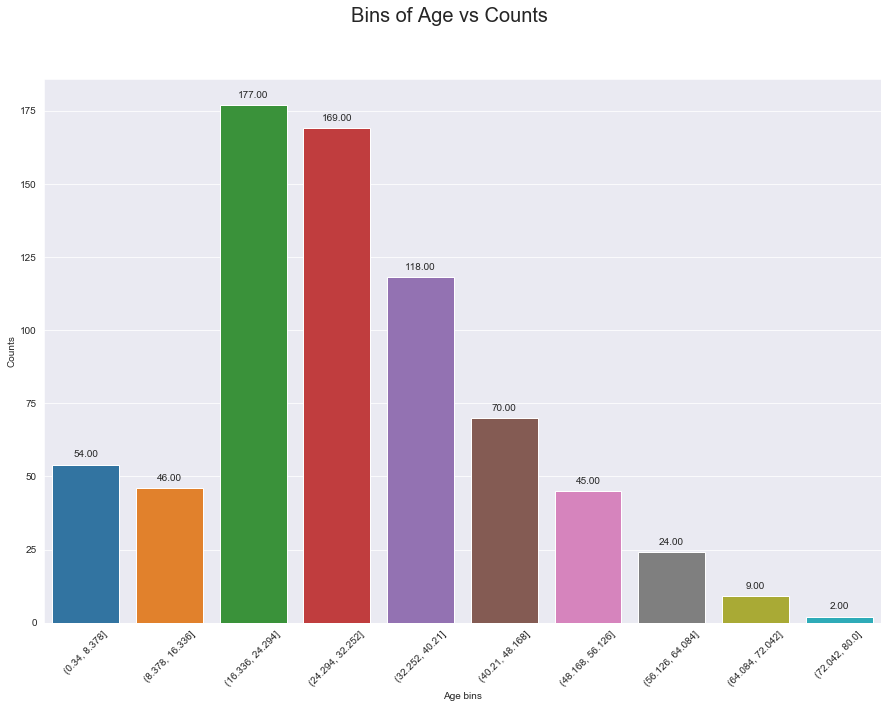

In [34]:
fig, ax = plt.subplots(figsize = (15,10))
fig.suptitle("Bins of Age vs Counts", fontsize = 20)
sns.set_style("darkgrid")
ax = sns.barplot(x = age_df["Age bins"], y = age_df["Counts"], data = age_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Count of passengers/age bin => The majority of the passengers were between 16-24-32-40 years, then 0-8-16, and 48-56 ). Very few passenger after 64.

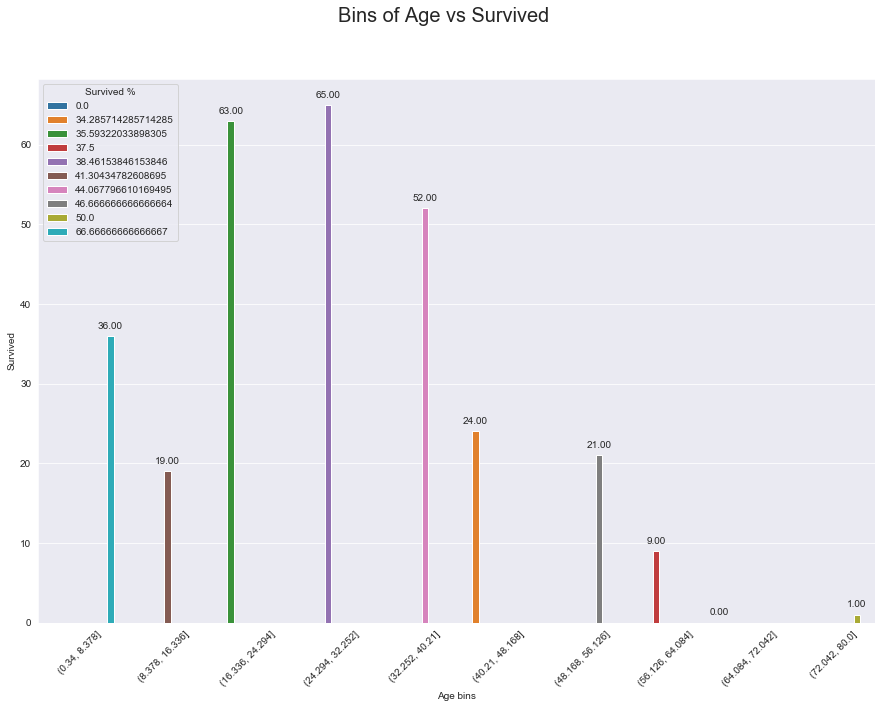

In [35]:
fig, ax = plt.subplots(figsize = (15,10))
fig.suptitle("Bins of Age vs Survived", fontsize = 20)
sns.set_style("darkgrid")
ax = sns.barplot(x = age_df["Age bins"], y = age_df["Survived"], hue = age_df["Survived %"], data = age_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

### Number of Survived Passengers and % /bin of age. Those between 0-8 had 66% chance of survival, the others between 30-40% / bin of age.

## Making a correlation matrix, to visualize the correlation between all the fatures.

In [36]:
# What are the categorical features and their uniqueness.
categorical ,uniqueness

(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
              Unique Values      Feature
 PassengerId            891  PassengerId
 Survived                 2     Survived
 Pclass                   3       Pclass
 Name                   891         Name
 Sex                      2          Sex
 Age                     88          Age
 SibSp                    7        SibSp
 Parch                    7        Parch
 Ticket                 681       Ticket
 Fare                   248         Fare
 Cabin                  147        Cabin
 Embarked                 3     Embarked)

In [37]:
correlation_df = df.copy()
correlation_df.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)
correlation_df["Sex"].replace(to_replace = ["male", "female"], value = [0, 1], inplace = True)
correlation_df["Embarked"].replace(to_replace = ["S", "Q", "C"], value = [0, 1, 2], inplace = True)
correlation_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,2.0


Survived    1.000000
Pclass     -0.338481
Sex         0.543351
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Embarked    0.169718
Name: Survived, dtype: float64

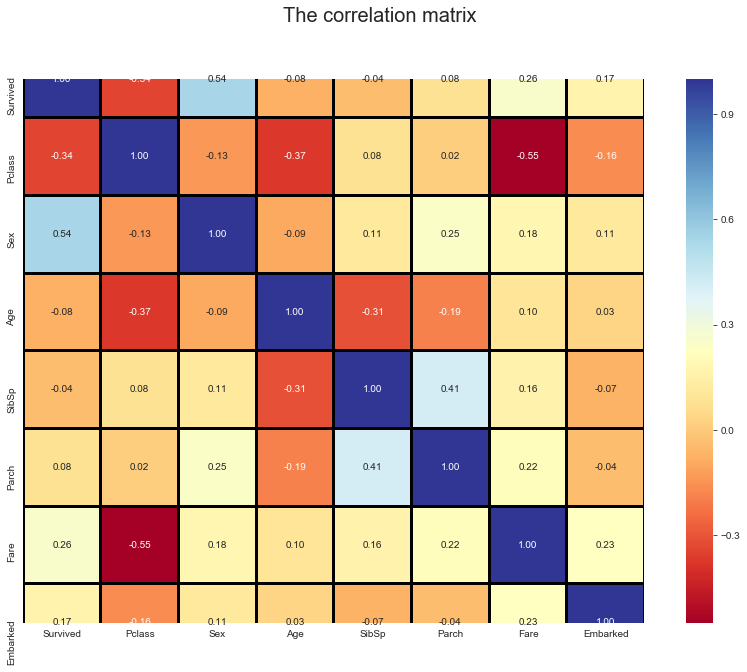

In [38]:
# compute pairwise correlation of the features
correlation = correlation_df.corr()
fig, ax = plt.subplots(figsize = (15,10))
fig.suptitle("The correlation matrix", fontsize = 20)
ax = sns.heatmap(data = correlation, square = True, annot = True, fmt = ".2f", linewidths = 2, linecolor = "black", cmap = "RdYlBu");
correlation["Survived"]

### With respect to the target variable 
1. Pclass has a -0.33 correlation, 
2. Age, SibSp and Parch have -0.07, -0.03, 0.08, hence there is very small correlation between target variable and these.
3. Embarked and Fare have 0.17, 0.25, relatively low but now insignificant correlation to the target variable.
4. **Sex has 0.54 correlation.**, definitely the strongest correlation to the target variable.


### With respect to one another.
1. Pclass has -0.55 correlation with Fare (Pclass increases, Fare decreases) True (False for the cases where Tickets for higher classes were stolen)
2. Pclass has -0.37 correlation with Age(Pclass increase, Age decrease) not always True
3. SibSp has -0.31 correlation with Age(Age increase, SibSp decrease) not always True.
4. Parch has a 0.41 correlation with SibSp.


## About the outliers, inconsistent or mispelled data.
### For the Numeric features select as outliers all the samples which have values situated above 3 std(standar deviation)

In [39]:
outliers = pd.DataFrame(index = correlation_df.columns, columns = ["Std1%","Std2%","Std3%","Std4%",">Std4%"])
# std_age and std_fare are the ranges of standard deviations for Age and Fare features
std_age, std_fare = {"Age": "std"}, {"Fare": "std"}
for index in outliers.index:
    correlation_df[index].std()
    std1_max, std1_min = correlation_df[index].std() + correlation_df[index].mean(), correlation_df[index].mean() - correlation_df[index].std()
    std2_max, std2_min = 2*correlation_df[index].std() + correlation_df[index].mean(), correlation_df[index].mean() - 2*correlation_df[index].std()
    std3_max, std3_min = 3*correlation_df[index].std() + correlation_df[index].mean(), correlation_df[index].mean() - 3*correlation_df[index].std()
    std4_max, std4_min = 4*correlation_df[index].std() + correlation_df[index].mean(), correlation_df[index].mean() - 4*correlation_df[index].std()
    if index == "Age":
        std_age["std1"] = [std1_min, std1_max]
        std_age["std2"] = [std2_min, std1_min, std1_max, std2_max]
        std_age["std3"] = [std3_min, std2_min, std2_max, std3_max]
        std_age["std4"] = [std4_min, std3_min, std3_max, std4_max]
    
    if index == "Fare":
        std_fare["std1"] = [std1_min, std1_max]
        std_fare["std2"] = [std2_min, std1_min, std1_max, std2_max]
        std_fare["std3"] = [std3_min, std2_min, std2_max, std3_max]
        std_fare["std4"] = [std4_min, std3_min, std3_max, std4_max]
    
    outliers.loc[index,"Std1%"] = len(correlation_df[(correlation_df[index] <= (std1_max)) & (correlation_df[index] >= (std1_min))])/len(correlation_df) 
    outliers.loc[index,"Std2%"] = len(correlation_df[((correlation_df[index] <= (std2_max)) & (correlation_df[index] >= (std1_max))) | ((correlation_df[index] <= (std1_min)) & (correlation_df[index] >= (std2_min)))])/len(correlation_df) 
    outliers.loc[index,"Std3%"] = len(correlation_df[((correlation_df[index] <= (std3_max)) & (correlation_df[index] >= (std2_max))) | ((correlation_df[index] <= (std2_min)) & (correlation_df[index] >= (std3_min)))])/len(correlation_df) 
    outliers.loc[index,"Std4%"] = len(correlation_df[((correlation_df[index] <= (std4_max)) & (correlation_df[index] >= (std3_max))) | ((correlation_df[index] <= (std3_min)) & (correlation_df[index] >= (std4_min)))])/len(correlation_df) 
    outliers.loc[index,">Std4%"] = len(correlation_df[((correlation_df[index] > (std4_max)) & (correlation_df[index] <= (correlation_df[index].max())))])/len(correlation_df)
outliers

,Std1%,Std2%,Std3%,Std4%,>Std4%
Survived,0.616162,0.383838,0,0,0
Pclass,0.757576,0.242424,0,0,0
Sex,0.647587,0.352413,0,0,0
Age,0.579125,0.189675,0.030303,0.00224467,0
SibSp,0.916947,0.0314254,0.0179574,0.020202,0.013468
Parch,0.893378,0,0.0897868,0.00561167,0.0112233
Fare,0.91807,0.0392817,0.020202,0.010101,0.0123457
Embarked,0.809203,0.188552,0,0,0


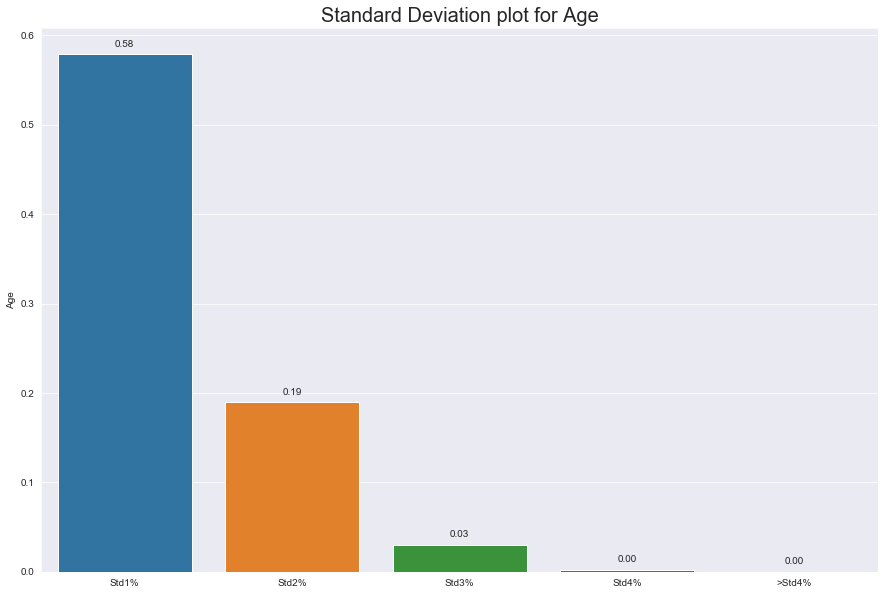

In [40]:
fig, ax = plt.subplots(figsize = (15,10))
plt.title("Standard Deviation plot for Age", fontsize = 20)
ax = sns.barplot(x = outliers.columns, y = outliers.loc["Age", :])
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [41]:
for feature, values in std_age.items():
    print(feature, values)

Age std
std1 [15.172620314724776, 44.225614979392866]
std2 [0.6461229823907324, 15.172620314724776, 44.225614979392866, 58.752112311726904]
std3 [-13.88037434994331, 0.6461229823907324, 58.752112311726904, 73.27860964406095]
std4 [-28.406871682277355, -13.88037434994331, 73.27860964406095, 87.805106976395]


* 58% of the population's age is in the std1 range,
* 19% of the population's age is in the std2 range,
* 3% (27) of the population's age is in the std3 range
* 0.22% (approx 2 samples) of the population is in the std4 range ====> Possible Outliers.
* 0% of the population is > std4 range
* The rest (20%) is the missing data (177 samples)

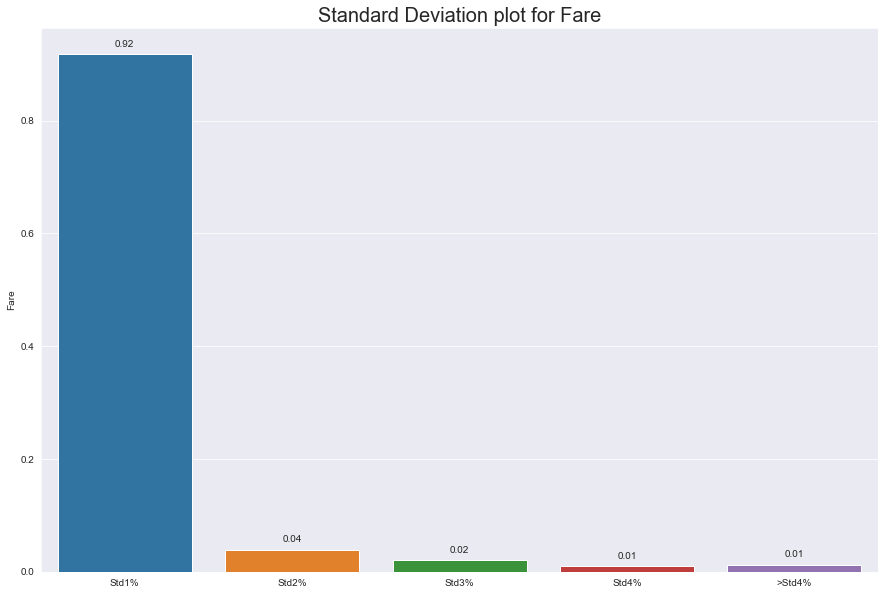

In [42]:
fig, ax = plt.subplots(figsize = (15,10))
plt.title("Standard Deviation plot for Fare", fontsize = 20)
ax = sns.barplot(x = outliers.columns, y = outliers.loc["Fare", :])
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [43]:
for feature, values in std_fare.items():
    print(feature, values)

Fare std
std1 [-17.489220628606304, 81.8976365657555]
std2 [-67.1826492257872, -17.489220628606304, 81.8976365657555, 131.59106516293642]
std3 [-116.87607782296811, -67.1826492257872, 131.59106516293642, 181.2844937601173]
std4 [-166.56950642014903, -116.87607782296811, 181.2844937601173, 230.9779223572982]


* 92% of the population's Fare is in the range of std1
* 4%(35.5) of the population's Fare is in the range of std2
* 2%(17.8) of the population's Fare is in the range of std3
* 1%(approx 9) of the population's Fare is in the range of std4 =======> Possible Outliers
* 1%(approx 9) of the population's Fare is in the range >std4 =========> Possible Outliers

### Dealing with categorical features. correlation_df is the df with no PassengerId, Name, Ticket and Cabin. 
1. PassengerId is not relevant because it is only an index which counts the population in the dataset. It did not contribute at all in predicting the target variable.
2. Ticket is redundat since there is another feature `Pclass` which is the relevant. The most important part of a ticket it's the price and the class. The rest string identifiers are not necessary.
3. Cabin seems an important feature in predicting the survivability on the Titanic, but it has a lot of missing values (73% of all the population does not have a cabin. Cabin is a categorical feature hard to manage and assess because it seems so random. The uniqueness is roughly 147 from all the 204 entries of Cabin. If it is encoded, there would be at least more 147 columns to deal with. It is not so practical, it is not a good predictor since there are a lot of missing values. 
4. Name could be feature engineered based on the honoric strings. "Mr, Mrs, Lady...". The new features would indicate the social status, and the age.

In [44]:
# Head of the correlation_df
correlation_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [45]:
# Let's see the values of the Name feature
df["Name"].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

### After a quick look at the values of the Name feature, we could identify the following unique values:
**`Mr., Mrs.,Miss.,Lady.,Don.,Master.,Rev.`**

In [46]:
# Status is a list of the status ranks of the people. 
status = [" Mr", " Mrs", " Miss", " Lady", " Don", " Master", " Rev"," Jonkheer"," Dr"," the Countess"," Capt", " Mlle", " Col", " Sir", " Major", " Mme"]
# correlation_name_df is a copy of cirrelation_df
correlation_name_df = correlation_df.copy()
# series_name is a Series cotaining all the names of the df
series_name = pd.Series(data = df["Name"])
# splitted is the splitted ndarray at ","
splitted = []
for i in range(0, len(series_name)):
    splitted.append(series_name[i].split(","))
# array1 is the ndarray cotaining all names after "," and splitted at "."
array1 = []
for i in range(0, len(series_name)):
    array1.append(splitted[i][1].split("."))
# array2 is the array with status
array2 = []
for i in range(0, len(series_name)):
    array2.append(array1[i][0])
array2

[' Mr',
 ' Mrs',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mrs',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Don',
 ' Mrs',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mrs',
 ' Master',
 ' Mr',
 ' Mrs',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Master',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Master',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Master',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mrs',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mrs',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Mr',
 ' Miss',
 ' Mr',
 ' Miss',
 ' Mr'

In [47]:
series_name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [48]:
splitted

[['Braund', ' Mr. Owen Harris'],
 ['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)'],
 ['Heikkinen', ' Miss. Laina'],
 ['Futrelle', ' Mrs. Jacques Heath (Lily May Peel)'],
 ['Allen', ' Mr. William Henry'],
 ['Moran', ' Mr. James'],
 ['McCarthy', ' Mr. Timothy J'],
 ['Palsson', ' Master. Gosta Leonard'],
 ['Johnson', ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)'],
 ['Nasser', ' Mrs. Nicholas (Adele Achem)'],
 ['Sandstrom', ' Miss. Marguerite Rut'],
 ['Bonnell', ' Miss. Elizabeth'],
 ['Saundercock', ' Mr. William Henry'],
 ['Andersson', ' Mr. Anders Johan'],
 ['Vestrom', ' Miss. Hulda Amanda Adolfina'],
 ['Hewlett', ' Mrs. (Mary D Kingcome) '],
 ['Rice', ' Master. Eugene'],
 ['Williams', ' Mr. Charles Eugene'],
 ['Vander Planke', ' Mrs. Julius (Emelia Maria Vandemoortele)'],
 ['Masselmani', ' Mrs. Fatima'],
 ['Fynney', ' Mr. Joseph J'],
 ['Beesley', ' Mr. Lawrence'],
 ['McGowan', ' Miss. Anna "Annie"'],
 ['Sloper', ' Mr. William Thompson'],
 ['Palsson', ' Miss. Torborg Danira'],
 [

In [49]:
# Adding the status features to the correlation_name_df
correlation_name_df["Status"] = array2
# Adding the status features to the correlation_name_df
for index in status:
    correlation_name_df[index] = index
# Encoding the status features of the correlation_name_df
for i in range(0, len(correlation_name_df)):
     for j in range(9, 25):
        if correlation_name_df.iloc[i, 8] == correlation_name_df.iloc[i, j]:
            correlation_name_df.iloc[i, j] = 1
            continue
        if correlation_name_df.iloc[i, 8] != correlation_name_df.iloc[i, j]:
            correlation_name_df.iloc[i, j] = 0
            continue

In [50]:
# drop the status feature
correlation_name_df.drop(columns = "Status", axis = 1, inplace = True)
correlation_name_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Mr,Mrs,...,Rev,Jonkheer,Dr,the Countess,Capt,Mlle,Col,Sir,Major,Mme
0,0,3,0,22.0,1,0,7.2500,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,71.2833,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,35.0,1,0,53.1000,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,35.0,0,0,8.0500,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
correlation_name_df.loc[:," Mr": " Mme"]

,Mr,Mrs,Miss,Lady,Don,Master,Rev,Jonkheer,Dr,the Countess,Capt,Mlle,Col,Sir,Major,Mme
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
887,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
889,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
count_status = {}
for key in correlation_name_df.loc[:," Mr": " Mme"].keys():
    count_status[key] = correlation_name_df.loc[:," Mr": " Mme"][key].sum()
count_status    

{' Mr': 517,
 ' Mrs': 125,
 ' Miss': 182,
 ' Lady': 1,
 ' Don': 1,
 ' Master': 40,
 ' Rev': 6,
 ' Jonkheer': 1,
 ' Dr': 7,
 ' the Countess': 1,
 ' Capt': 1,
 ' Mlle': 2,
 ' Col': 2,
 ' Sir': 1,
 ' Major': 2,
 ' Mme': 1}

In [53]:
survived_status = {}
for key,value in correlation_name_df.loc[:," Mr": " Mme"].items():
    k = 0
    for index in range(0, len(correlation_name_df)):
        if (correlation_name_df[key][index] == 1 & correlation_name_df["Survived"][index] == 1):
            k = k + 1
    survived_status[key] = k
survived_status

{' Mr': 81,
 ' Mrs': 99,
 ' Miss': 127,
 ' Lady': 1,
 ' Don': 0,
 ' Master': 23,
 ' Rev': 0,
 ' Jonkheer': 0,
 ' Dr': 3,
 ' the Countess': 1,
 ' Capt': 0,
 ' Mlle': 2,
 ' Col': 1,
 ' Sir': 1,
 ' Major': 1,
 ' Mme': 1}

In [54]:
status_df = pd.DataFrame(index = count_status.keys(), columns = ["Count"], data = count_status.values())
status_df["Survived"] = survived_status.values()
status_df

,Count,Survived
Mr,517,81
Mrs,125,99
Miss,182,127
Lady,1,1
Don,1,0
Master,40,23
Rev,6,0
Jonkheer,1,0
Dr,7,3
the Countess,1,1


### Plot of the Status Count.

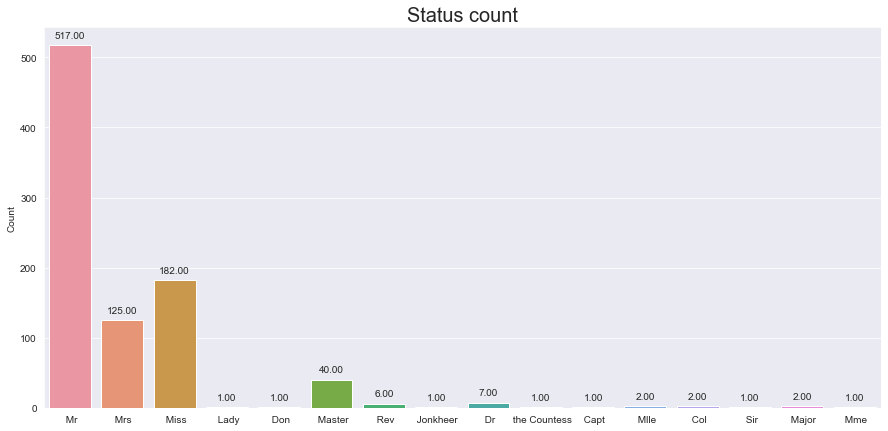

In [55]:
# Plot of the Status Count.
fig,ax = plt.subplots(figsize = (15,7))
plt.title("Status count", fontsize = 20)
ax = sns.barplot(x = status_df.index, y = status_df["Count"], data = status_df)
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

The majority of the population was `Mr`, then `Miss` and `Mrs`, following `Master`. The rest of the status is very rare. 

### Plot of the Status Survived.

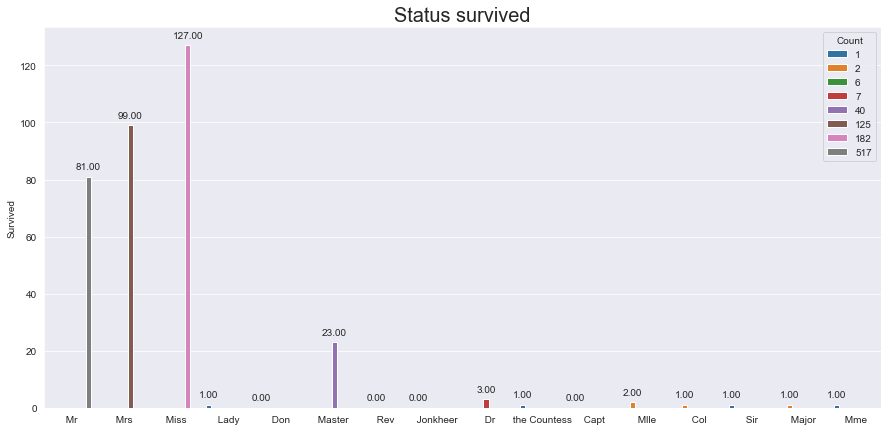

In [56]:
# Plot of the Status Survivors.
fig,ax = plt.subplots(figsize = (15,7))
plt.title("Status survived", fontsize = 20)
ax = sns.barplot(x = status_df.index, y = status_df["Survived"], data = status_df, hue = status_df["Count"])
for a in ax.patches:
    ax.annotate(format(a.get_height(), '.2f'), (a.get_x() + a.get_width() / 2., a.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

For all the the 517 `Mr` only 81 survived.

Mrs and Miss have a higher survivability rate

Master has nearly half percent survivability rate.

The majority of the high status people survived : `the Countess, Mlle, Col, Sir, Major, Mme`

# From now on we will use the correlation_name_df dataset to build the models.

## Missing values?

In [57]:
correlation_name_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Mr,Mrs,...,Rev,Jonkheer,Dr,the Countess,Capt,Mlle,Col,Sir,Major,Mme
0,0,3,0,22.0,1,0,7.2500,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,38.0,1,0,71.2833,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,35.0,1,0,53.1000,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,3,0,35.0,0,0,8.0500,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
correlation_name_df.isna().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
 Mr                0
 Mrs               0
 Miss              0
 Lady              0
 Don               0
 Master            0
 Rev               0
 Jonkheer          0
 Dr                0
 the Countess      0
 Capt              0
 Mlle              0
 Col               0
 Sir               0
 Major             0
 Mme               0
dtype: int64

### Age has 177 missing values, and Embarked has 2. For Embarked it is easy.
### For Age we can do 2 things: 
    1) Fill the missing values with the median value.
    2) Drop the missing values
    
##  1) Fill the missing values with the median value.

In [59]:
missing_values_age = correlation_name_df[correlation_name_df["Age"].isna() == True]
missing_values_embarked = correlation_name_df[correlation_name_df["Embarked"].isna() == True]
missing_values_age.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Mr,Mrs,...,Rev,Jonkheer,Dr,the Countess,Capt,Mlle,Col,Sir,Major,Mme
5,0,3,0,NaN,0,0,8.4583,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
17,1,2,0,NaN,0,0,13.0000,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
19,1,3,1,NaN,0,0,7.2250,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26,0,3,0,NaN,0,0,7.2250,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0
28,1,3,1,NaN,0,0,7.8792,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
missing_values_embarked.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Mr,Mrs,...,Rev,Jonkheer,Dr,the Countess,Capt,Mlle,Col,Sir,Major,Mme
61,1,1,1,38.0,0,0,80.0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
829,1,1,1,62.0,0,0,80.0,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0


For the 2 missing values from `Embarked`, the Pclass is 1, Fare  = 80, They both survived. It means that both were from S.

### A tedious task is to check the Status, Pclass, SibSp, Fare, Embarked for each Age missing instance. This could take a very long time... and it's possible no to have good results.

### For now, the median value will be used.

In [61]:
data = correlation_name_df.copy()
data.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked         float64
 Mr                int64
 Mrs               int64
 Miss              int64
 Lady              int64
 Don               int64
 Master            int64
 Rev               int64
 Jonkheer          int64
 Dr                int64
 the Countess      int64
 Capt              int64
 Mlle              int64
 Col               int64
 Sir               int64
 Major             int64
 Mme               int64
dtype: object

# ALWAYS CHECK THE DTYPES!!!! AGE AND EMBARKED ARE OBJECT, THE MODELS WON'T WORK!!!!  CHANGE THE OBJECT DTYPE TO NUMERIC

In [62]:
data["Age"], data["Fare"] = pd.to_numeric(df["Age"]), pd.to_numeric(df["Fare"])
data.dtypes

Survived           int64
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked         float64
 Mr                int64
 Mrs               int64
 Miss              int64
 Lady              int64
 Don               int64
 Master            int64
 Rev               int64
 Jonkheer          int64
 Dr                int64
 the Countess      int64
 Capt              int64
 Mlle              int64
 Col               int64
 Sir               int64
 Major             int64
 Mme               int64
dtype: object

In [66]:
data.isna().sum()

Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
 Mr              0
 Mrs             0
 Miss            0
 Lady            0
 Don             0
 Master          0
 Rev             0
 Jonkheer        0
 Dr              0
 the Countess    0
 Capt            0
 Mlle            0
 Col             0
 Sir             0
 Major           0
 Mme             0
dtype: int64

In [67]:
data["Age"] = data["Age"].fillna(value = data["Age"].median())
# For Embarked feature, S is encoded as 0 above.
data["Embarked"] = data["Embarked"].fillna(value = 0)

### All features are numeric and there are no missing values

## Splitting the data into feature space `X` and target variable space `y`.

In [68]:
y = data["Survived"]
X = data.drop(columns = "Survived", axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Mr,Mrs,Miss,...,Rev,Jonkheer,Dr,the Countess,Capt,Mlle,Col,Sir,Major,Mme
0,3,0,22.0,1,0,7.2500,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,2.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,35.0,0,0,8.0500,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
887,1,1,19.0,0,0,30.0000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
888,3,1,28.0,1,2,23.4500,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
889,1,0,26.0,0,0,30.0000,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into training and test sets.

In [69]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(712, 179, 712, 179)

## Building the models

In [147]:
def building_models(X_train, X_test, y_train, y_test, models):
    np.random.seed(42)
    classifiers = {}
    predictions = {}
    predict_proba = {}
    accuracy = {}
    baseline_dict={}
    for key, value in baseline_models.items():
        classifiers[key] = value.fit(X_train, y_train)
        predictions[key] = classifiers[key].predict(X_test)
        predict_proba[key] = classifiers[key].predict_proba(X_test)
        accuracy[key] = classifiers[key].score(X_test, y_test)
        continue
    return [classifiers, predictions, accuracy]

baseline_models = {"RandomForestClassifier": RandomForestClassifier(), "LogisticRegression": LogisticRegression(),"SVC": SVC(probability = True), "DecisionTree": DecisionTreeClassifier(), "KNClassifier": KNeighborsClassifier(), "AdaBoostClassifier": AdaBoostClassifier(), "GradientBoostingClassifier": GradientBoostingClassifier()}
baseline_results = building_models(X_train, X_test, y_train, y_test, baseline_models)
baseline_results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[{'RandomForestClassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=10,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False),
  'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False),
  'SVC': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3

## Max accuracy is obtained for:

In [152]:
for key,value in baseline_results[2].items():
    if(max(baseline_results[2].values)==)

{'RandomForestClassifier': 0.8100558659217877,
 'LogisticRegression': 0.8100558659217877,
 'SVC': 0.7039106145251397,
 'DecisionTree': 0.7597765363128491,
 'KNClassifier': 0.7262569832402235,
 'AdaBoostClassifier': 0.7821229050279329,
 'GradientBoostingClassifier': 0.8156424581005587}


## The baseline models are build, now it's time to build confusion matrix

In [148]:
def plot_confusion_matrix(models, results, text):
    """
    This Function plots the confusion matrices for all moldes.
    """
    confusion = {}
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (14,7))
    sns.set(font_scale=1.4);
    fig.suptitle(text, fontsize = 20)
    i = 0;
    j = 0;
    for key in models.keys():
        confusion[key] = confusion_matrix(y_test, results[1][key])
        group_names = ["TN", "FP", "FN", "TP"]
        group_counts = ["{0:0.0f}".format(value) for value in
                    confusion[key].flatten()]
        labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_names,group_counts)]
        labels = np.asarray(labels).reshape(2,2)
        if (j < 4):
            if(i == 1):
                sns.heatmap(data = confusion[key], annot = labels, annot_kws={"size": 16}, cmap = "Blues", ax = ax[i][j], fmt = "", cbar = False);
                ax[i][j].set_xlabel('Predicted', fontsize = 20);
                ax[i][j].set_ylim([0,2]);
                ax[i][j].set_title(key)
                j = j + 1
                continue 

            if (j ==0):
                sns.heatmap(data = confusion[key], annot = labels, annot_kws={"size": 16}, cmap = "Blues", ax = ax[i][j], fmt = "", cbar = False);
                ax[i][j].set_ylabel('Actual', fontsize = 20)
                ax[i][j].set_ylim([0,2]);
                ax[i][j].set_title(key)
                j = j + 1
                continue 

            if (j == 3):
                sns.heatmap(data = confusion[key], annot = labels, annot_kws={"size": 16}, cmap = "Blues", ax = ax[i][j], fmt = "");
                ax[i][j].set_ylim([0,2]);
                ax[i][j].set_title(key)
                j = j + 1
                continue

            sns.heatmap(data = confusion[key], annot = labels, annot_kws={"size": 16}, cmap = "Blues", ax = ax[i][j], cbar = False, fmt = "");
            ax[i][j].set_ylim([0,2]);
            ax[i][j].set_title(key)
            j = j + 1
            continue

        if (j == 4):
            j = 0
            i = i + 1
            ax[i][j].set_title(key)
            sns.heatmap(data = confusion[key], annot = labels, annot_kws={"size": 16}, cmap = "Blues", ax = ax[i][j], cbar = False, fmt = "");
            ax[i][j].set_ylabel('Actual', fontsize = 20);
            ax[i][j].set_xlabel('Predicted', fontsize = 20);
            ax[i][j].set_ylim([0,2]);
            ax[i][j].set_title(key)
            j = j + 1
            continue
            fig.tight_layout()

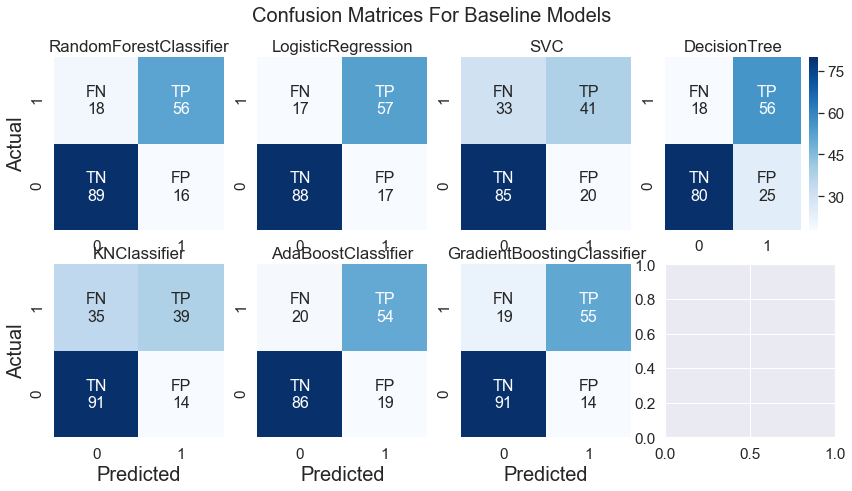

In [149]:
plot_confusion_matrix(models = baseline_models, results = baseline_results, text = "Confusion Matrices For Baseline Models")

### Making a function which shows the metrics

In [ ]:
def metrics(models, results, text):
    """
    This function return a dataframe containing all the classifiers and the associated scored for the target variable.
    """
    

In [173]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[89, 16],
       [19, 55]], dtype=int64)

In [178]:
classification_report(y_test, y_pred, output_dict = True)

{'0': {'precision': 0.8240740740740741,
  'recall': 0.8476190476190476,
  'f1-score': 0.8356807511737089,
  'support': 105},
 '1': {'precision': 0.7746478873239436,
  'recall': 0.7432432432432432,
  'f1-score': 0.7586206896551724,
  'support': 74},
 'accuracy': 0.8044692737430168,
 'macro avg': {'precision': 0.7993609806990088,
  'recall': 0.7954311454311453,
  'f1-score': 0.7971507204144406,
  'support': 179},
 'weighted avg': {'precision': 0.8036409018980425,
  'recall': 0.8044692737430168,
  'f1-score': 0.8038235190375541,
  'support': 179}}

In [175]:
precision_score(y_test, y_pred)

0.7746478873239436

In [180]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



TypeError: fromkeys expected at least 1 arguments, got 0

# hhjj
 * jhjh
 
1. jhgjg
2. `jhkjhk`

SyntaxError: invalid syntax (<ipython-input-146-84acc3b81400>, line 1)